# **Import Library**

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px
import glob
from scipy import stats

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


In [5]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# **Import Dataset**

In [43]:
df = pd.read_csv('train_prototipe.csv')

# Replace the values in the 'Late' column
df['Late'] = df['Late'].replace({-1: 0, 0: 1})

df.sample(10)


,Calls,Cost,Purchases,Importance,Discount,Weight (gram),Late,Weight_category_encoded,Reorder_purchases
2652,-0.5,-0.682927,0.0,0,2.166667,-0.846597,1.0,-0.666667,0.0
8059,0.5,-0.280488,1.0,0,-0.666667,0.445102,0.0,1.333333,0.0
1853,-0.5,-0.292683,4.0,1,0.000000,-0.544775,1.0,0.000000,0.0
9572,-0.5,-0.231707,2.0,0,-0.500000,-0.035820,0.0,0.000000,0.0
8957,0.5,-0.390244,1.0,1,-0.333333,0.193428,1.0,0.666667,0.0
1529,-0.5,-0.634146,-1.0,0,3.166667,-0.775580,1.0,-0.666667,-1.0
6315,0.5,0.524390,2.0,1,0.000000,-0.804859,1.0,-0.666667,0.0
5166,0.5,-0.451220,-1.0,0,-0.833333,0.457561,1.0,1.333333,-1.0
10011,0.0,0.475610,-1.0,0,-0.500000,0.109952,1.0,0.666667,-1.0
6228,1.0,0.670732,1.0,0,-0.166667,-0.958106,0.0,-0.666667,0.0


# **Stage 3**

## **Modelling**

### **Function**

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(model):
    y_pred = model.predict_proba(x_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0,1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.plot([0,1], [0,1], 'k--' )
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [8]:
def plot_feature_importances(model):
    import pandas as pd
    import matplotlib.pyplot as plt

    # DataFrame dengan tingkat kepentingan fitur
    feature_importances = pd.DataFrame({
        'feature': x_train.columns,
        'importance': model.feature_importances_
    })

    # Reset index DataFrame
    feature_importances = feature_importances.reset_index(drop=True)

    # Group by
    fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending=False)[:20][::-1]

    # Plot
    plt.figure(figsize=(6, 5))
    fi.plot(kind='barh')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top Feature Importances - {model}')
    plt.show()

# Contoh pemanggilan
# plot_feature_importances(best_model_xgb, x_train, 'XGBRegressor')


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, x, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))

#contoh pemanggilan
#eval_regression(regressor)

In [10]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    # Evaluation Metrics
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("ROC AUC (Test Set): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("ROC AUC (Train Set): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

   
    # Cross-validation
    score = cross_validate(model, x_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('\nRecall (Cross-validation Train): %.2f' % score['train_score'].mean())
    print('Recall (Cross-validation Test): %.2f' % score['test_score'].mean())
    
    # Confusion Matrix
    print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_pred))

def show_best_hyperparameter(model):
    if hasattr(model, 'best_estimator_'):
        print(model.best_estimator_.get_params())
    else:
        print("The model is not a GridSearchCV or RandomizedSearchCV instance.")

# Example usage
# Assuming x_train, x_test, y_train, y_test are already defined
#model = RandomForestClassifier(random_state=42)
#model.fit(x_train, y_train.values.ravel())

#eval_classification(model)
#show_feature_importance(model)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model):
    # Generate predictions
    y_pred = model.predict(x_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

def draw_learning_curve(model_type, param_values):
    if model_type == 'LogisticRegression':
        model = LogisticRegression()
    elif model_type == 'KNeighborsClassifier':
        model = KNeighborsClassifier()
    elif model_type == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier()
    elif model_type == 'RandomForestClassifier':
        model = RandomForestClassifier()
    elif model_type == 'SVC':
        model = SVC(probability=True)
    else:
        raise ValueError("Invalid model type. Supported types are 'LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', and 'SVC'.")

    train_scores = []
    test_scores = []

    for param_value in param_values:
        if model_type == 'LogisticRegression':
            model.set_params(C=param_value)
        elif model_type == 'KNeighborsClassifier':
            model.set_params(n_neighbors=param_value)
        elif model_type == 'DecisionTreeClassifier':
            model.set_params(max_depth=param_value)
        elif model_type == 'RandomForestClassifier':
            model.set_params(n_estimators=param_value)
        elif model_type == 'SVC':
            model.set_params(C=param_value)

        model.fit(x_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(param_value) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter Value')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter Tuning - ' + model_type)
    plt.legend()
    plt.show()

#contoh pemanggilan
#param_values_rf = [50, 100, 150, 200]
#draw_learning_curve('RandomForestClassifier', param_values_rf)

#param_values_svc = [0.1, 1, 10]
#draw_learning_curve('SVC', param_values_svc)


### **Split Dataset**

In [44]:
x = df.drop(columns=['Late'])
y = df[['Late']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [45]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

train_ratio = len(x_train) / len(x)
test_ratio = len(x_test) / len(x)

print(f"Training set ratio: {train_ratio:.2f}")
print(f"Test set ratio: {test_ratio:.2f}")


x_train shape: (7699, 8)
x_test shape: (3300, 8)
y_train shape: (7699, 1)
y_test shape: (3300, 1)
Training set ratio: 0.70
Test set ratio: 0.30


### **Logistic Regression**

Accuracy (Test Set): 0.64
Precision (Test Set): 0.71
Recall (Test Set): 0.68
F1-Score (Test Set): 0.70
ROC AUC (Test Set): 0.72
ROC AUC (Train Set): 0.72

Recall (Cross-validation Train): 0.68
Recall (Cross-validation Test): 0.67

Confusion Matrix (Test Set):
 [[ 754  558]
 [ 627 1361]]


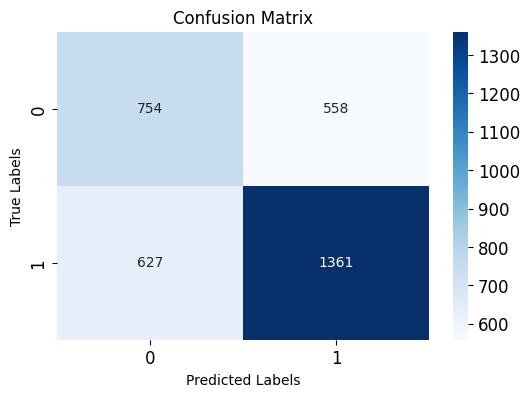

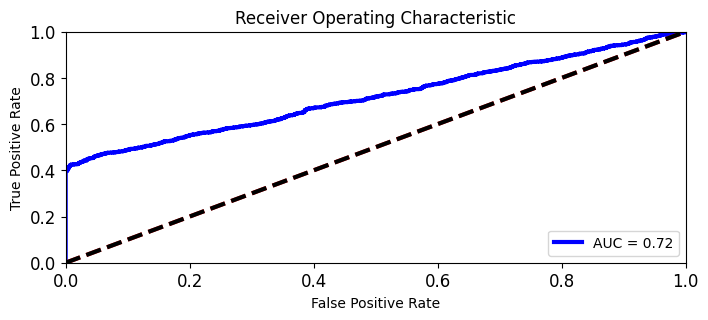

In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

eval_classification(logreg)
plot_confusion_matrix(logreg)
plot_roc(logreg)

param value: 0.001; train: 0.719931851416497; test: 0.7154474100701771
param value: 0.01; train: 0.7223569334536779; test: 0.71765079808117
param value: 0.1; train: 0.722616583754889; test: 0.7179164928595967
param value: 1; train: 0.7225874072052784; test: 0.7178681847180646
param value: 10; train: 0.7225697053658263; test: 0.7178582163713991
param value: 100; train: 0.722574183301498; test: 0.7178509318103745


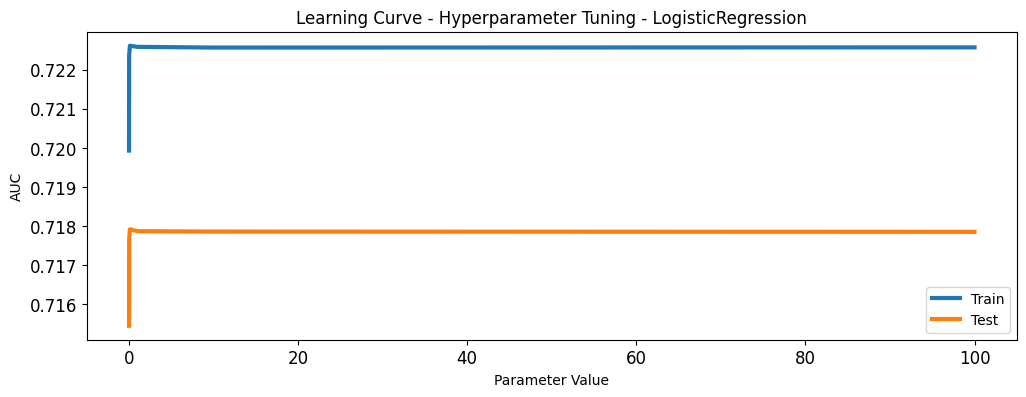

In [24]:
param_values_logreg = [0.001, 0.01, 0.1, 1, 10, 100]
draw_learning_curve('LogisticRegression', param_values_logreg)

- Tidak perlu hyperparameter tuning, karena nilai AUC cenderung stabil pada param value logistic regression

### **Decision Tree**

Accuracy (Test Set): 0.65
Precision (Test Set): 0.71
Recall (Test Set): 0.72
F1-Score (Test Set): 0.71
ROC AUC (Test Set): 0.64
ROC AUC (Train Set): 1.00

Recall (Cross-validation Train): 1.00
Recall (Cross-validation Test): 0.69

Confusion Matrix (Test Set):
 [[ 729  583]
 [ 565 1423]]


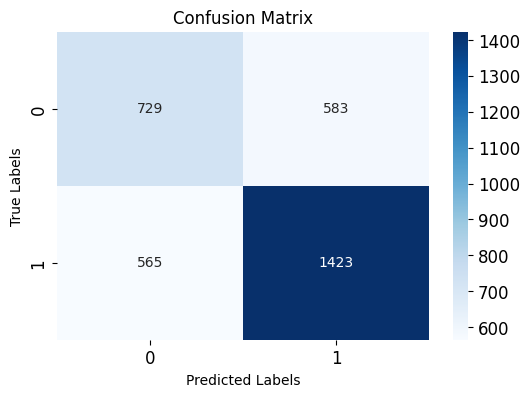

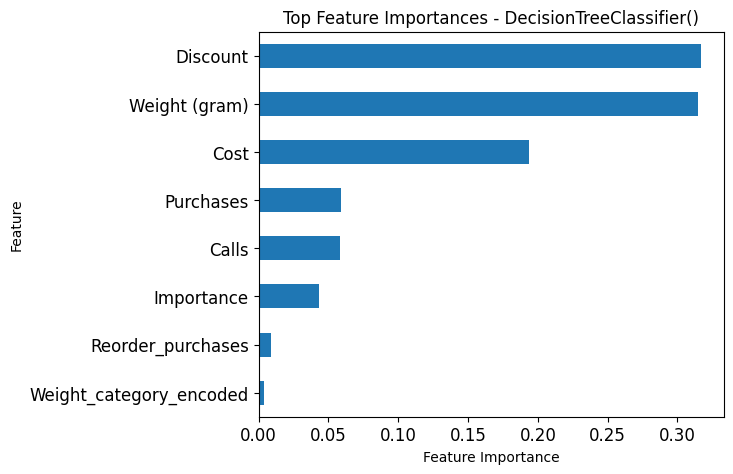

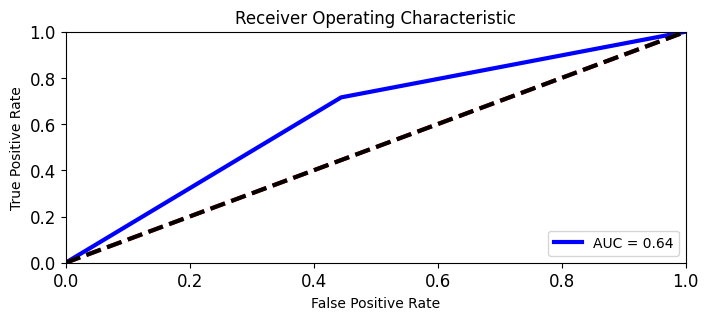

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
eval_classification(dt)
plot_confusion_matrix(dt)
plot_feature_importances(dt)
plot_roc(dt)

param value: 1; train: 0.7014207650273224; test: 0.7022132796780685
param value: 2; train: 0.7346914072612526; test: 0.7425467438779014
param value: 3; train: 0.7477541403413026; test: 0.7515393427639004
param value: 5; train: 0.7602693408338755; test: 0.7516043287161995
param value: 6; train: 0.7705025083436537; test: 0.7521777003484319
param value: 7; train: 0.7841141383822058; test: 0.7447144758796682


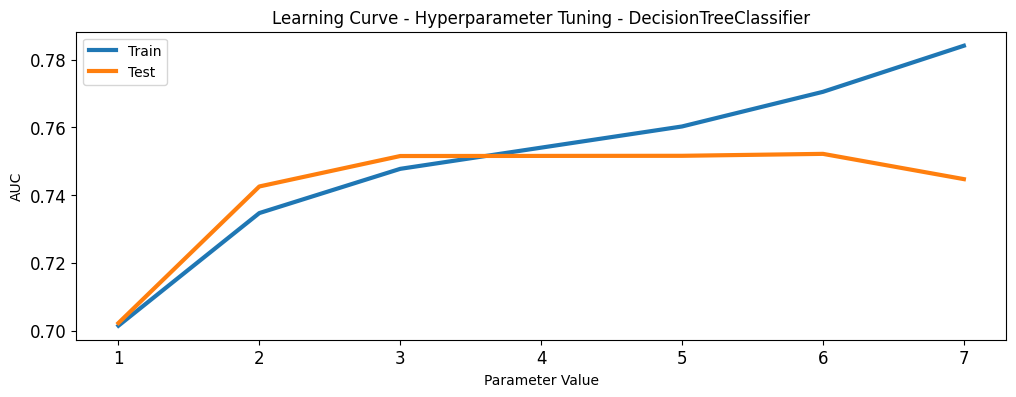

In [ ]:
param_values_dt = [1, 2, 3, 5, 6, 7]
draw_learning_curve('DecisionTreeClassifier', param_values_dt)

#### **Hypertuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Inisialisasi DecisionTreeClassifier
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_dt = grid_search.best_estimator_

# Evaluasi model
y_pred_proba = best_dt.predict_proba(x_test)
test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("AUC :", test_auc)


AUC : 0.7521777003484319


Accuracy (Test Set): 0.68
Precision (Test Set): 0.90
Recall (Test Set): 0.52
F1-Score (Test Set): 0.66
ROC AUC (Test Set): 0.75
ROC AUC (Train Set): 0.77

Recall (Cross-validation Train): 0.53
Recall (Cross-validation Test): 0.51

Confusion Matrix (Test Set):
 [[1201  111]
 [ 948 1040]]


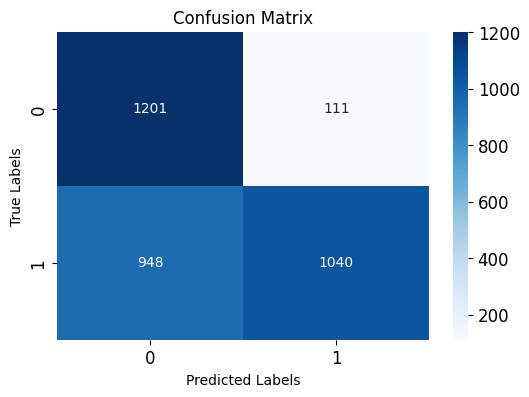

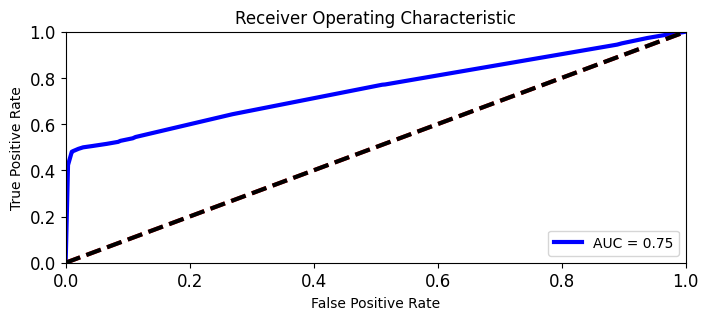

In [ ]:
eval_classification(best_dt)
plot_confusion_matrix(best_dt)
plot_roc(best_dt)

### **Random Forest**

Accuracy (Test Set): 0.67
Precision (Test Set): 0.76
Recall (Test Set): 0.67
F1-Score (Test Set): 0.71
ROC AUC (Test Set): 0.75
ROC AUC (Train Set): 1.00

Recall (Cross-validation Train): 1.00
Recall (Cross-validation Test): 0.64

Confusion Matrix (Test Set):
 [[ 898  414]
 [ 663 1325]]


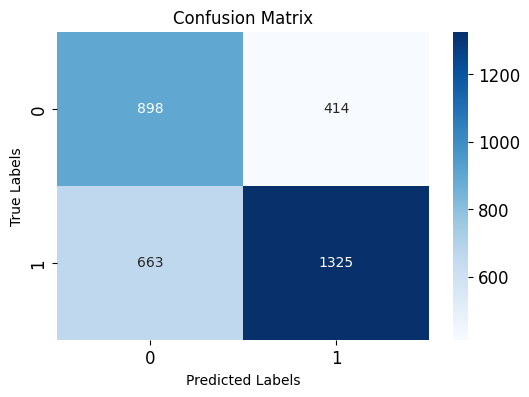

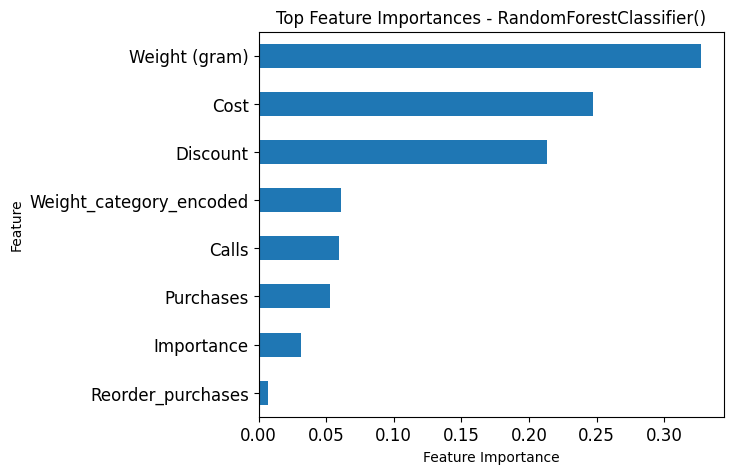

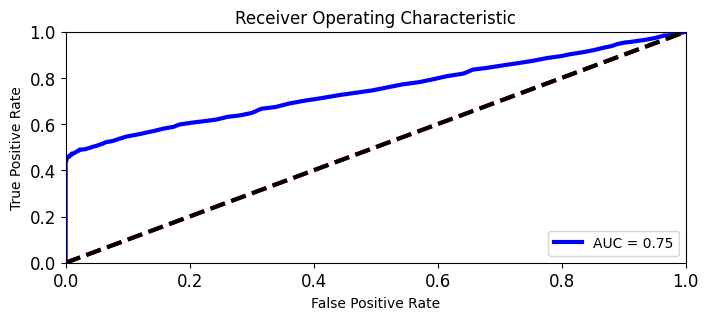

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
eval_classification(rf)
plot_confusion_matrix(rf)
plot_feature_importances(rf)
plot_roc(rf)

param value: 10; train: 0.9990559602023468; test: 0.7366153859130393
param value: 50; train: 1.0; test: 0.7489592662683418
param value: 100; train: 1.0; test: 0.7457634526672228
param value: 200; train: 1.0; test: 0.7485793189012122
param value: 300; train: 1.0; test: 0.7440858949428277
param value: 400; train: 1.0; test: 0.7451277788683319
param value: 500; train: 1.0; test: 0.745509068128282


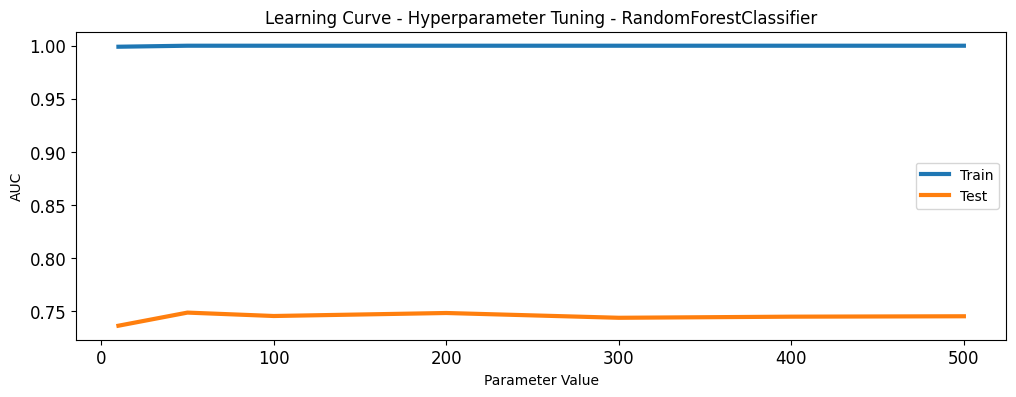

In [26]:
param_values_rf = [10, 50, 100, 200, 300, 400, 500]
draw_learning_curve('RandomForestClassifier', param_values_rf)


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf = RandomForestClassifier()


# Daftar hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Membuat label rata
y_train_ravel = y_train.values.ravel()

# Grid search dengan cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train_ravel)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters:", grid_search.best_params_)

# Menggunakan model dengan hyperparameter terbaik
best_rf = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [31]:
# Evaluasi model
y_pred_proba = best_rf.predict_proba(x_test)
test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print("AUC :", test_auc)

AUC : 0.7427744822594101


Accuracy (Test Set): 0.68
Precision (Test Set): 0.85
Recall (Test Set): 0.56
F1-Score (Test Set): 0.68
ROC AUC (Test Set): 0.74
ROC AUC (Train Set): 0.90

Recall (Cross-validation Train): 0.67
Recall (Cross-validation Test): 0.56

Confusion Matrix (Test Set):
 [[1120  192]
 [ 868 1120]]


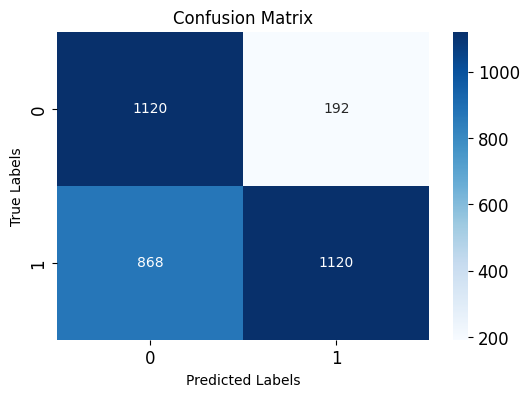

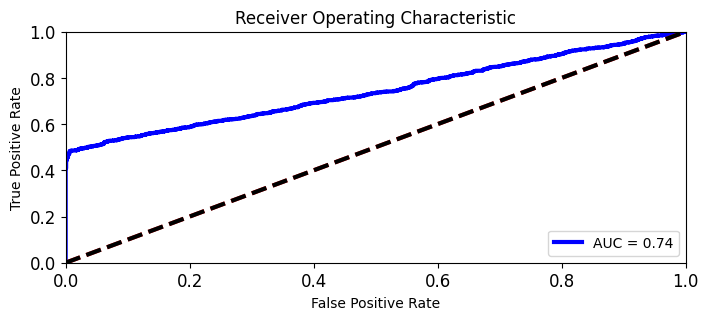

In [32]:
eval_classification(best_rf)
plot_confusion_matrix(best_rf)
plot_roc(best_rf)

### **SVC**

Accuracy (Test Set): 0.67
Precision (Test Set): 0.92
Recall (Test Set): 0.50
F1-Score (Test Set): 0.65
ROC AUC (Test Set): 0.73
ROC AUC (Train Set): 0.75

Recall (Cross-validation Train): 0.51
Recall (Cross-validation Test): 0.50

Confusion Matrix (Test Set):
 [[1224   88]
 [ 997  991]]


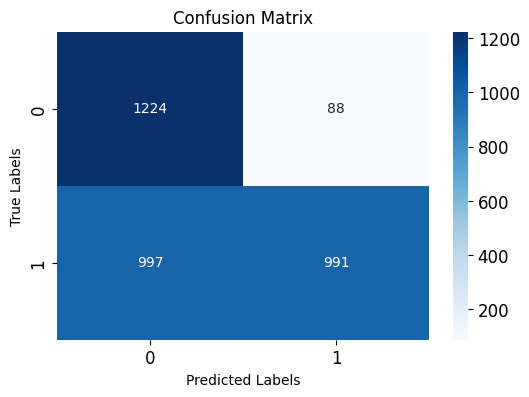

In [34]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)
eval_classification(svc)
plot_confusion_matrix(svc)


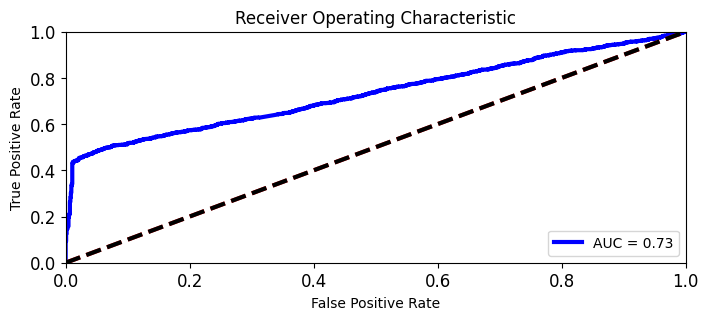

In [35]:
plot_roc(svc)

param value: 0.001; train: 0.7372955717414272; test: 0.7309493393286548
param value: 0.01; train: 0.7380762368548099; test: 0.7321033671541444
param value: 0.1; train: 0.7440688342674028; test: 0.7298723744908475
param value: 1; train: 0.7523648747927205; test: 0.7327168038720125
param value: 10; train: 0.7662255900030086; test: 0.7400968309859155
param value: 100; train: 0.7797563023446192; test: 0.7418424418461992


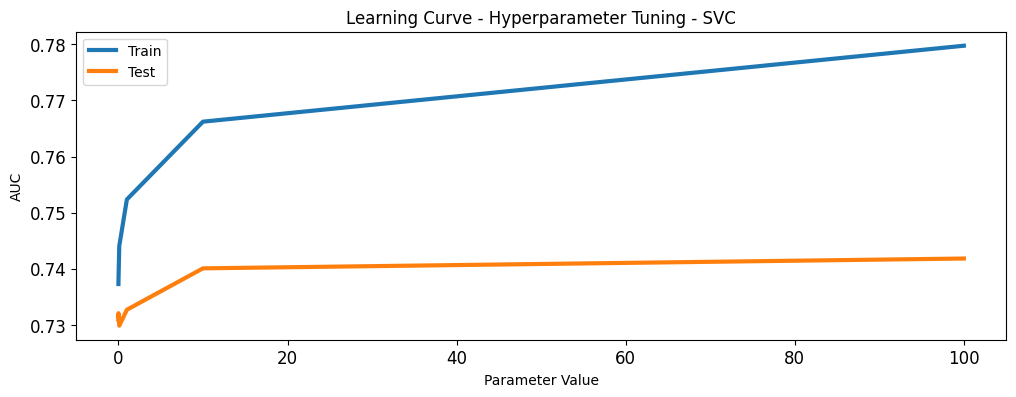

In [36]:
param_values_svc = [0.001, 0.01, 0.1, 1, 10, 100]
draw_learning_curve('SVC', param_values_svc)


#### Hypertuning

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Mengonversi y_train ke bentuk yang diharapkan
y_train_ravel = y_train.values.ravel()

svc = SVC(probability=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train_ravel)

print("Best Parameter:", grid_search.best_params_)

best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(x_test)


Best Parameter: {'C': 10}


Accuracy (Test Set): 0.68
Precision (Test Set): 0.91
Recall (Test Set): 0.52
F1-Score (Test Set): 0.66
ROC AUC (Test Set): 0.74
ROC AUC (Train Set): 0.77

Recall (Cross-validation Train): 0.53
Recall (Cross-validation Test): 0.52

Confusion Matrix (Test Set):
 [[1206  106]
 [ 960 1028]]


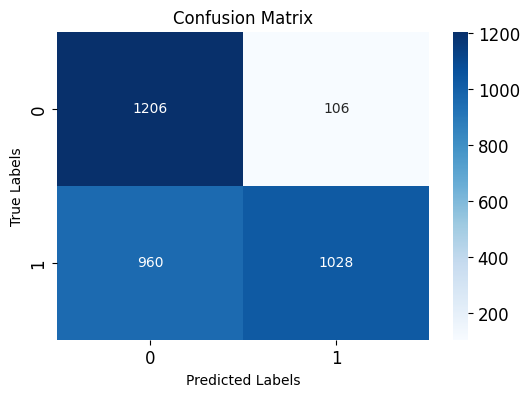

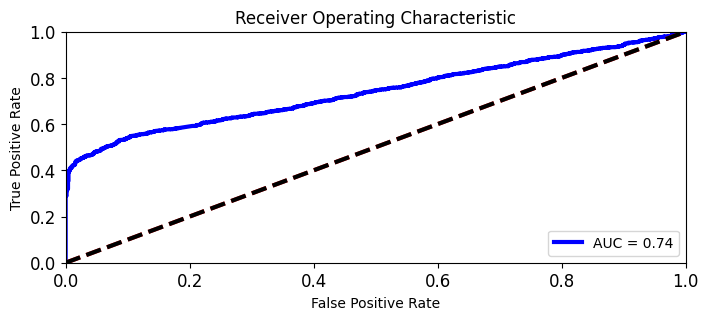

In [47]:
#evaluasi model
eval_classification(best_svc)
plot_confusion_matrix(best_svc)
plot_roc(best_svc)